# Title: Movie Genres classification
### Annie Liang
### Project 2, CS 6820 Machine Learning

## Data Extration
The dataset to be used is collected from Internet Movie Database (IMDB) using python scraping codes. The project targeted the movies that were release from year 1960 to 2018. Only movies that were produced in United States were considered. Films that have ambiguous production country names like USA/Canada were cross-checked from Wikipedia films pages and removed appropriately. Genre is the target variable. It represents the type of content that presents in a movie. A movie can have a multiple genre but for the purpose of the project only the first genre label that IMDB listed is collected. The dataset contains 41290 films.

Features:
* Title
* Year: from 1960 to 2018
* Director name
* Actor1: main actor of the movie
* Actor2: second main actor of the movie
* Rating: movie rating - ranging from 1 to 10
* Country: movie production location. This variable will be omitted in the analysis since only used to filter out non-USA films
* Release date
* Genre: target features with 20 categorices 

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bokeh as bk


In [2]:
imdb = pd.read_csv('out3.csv')

In [3]:
imdb.head()

,title director actor1 actor2,genre,year,rating,releasedate
0,Kate & Leopold JamesMangold MegRyan HughJackman,Comedy,2001,6.4,12 25 2001
1,December 7th: The Movie GreggToland WalterHust...,Action,2017,6.2,1943
2,The Dungeon of Harrow PatBoyette RussHarvey He...,Horror,1962,3.2,12 31 1964
3,Devil's Partner CharlesR.Rondeau EdgarBuchanan...,Horror,1961,4.9,9 1 1961
4,War Is Hell BurtTopper BaynesBarron MichaelBell,Drama,1961,6.4,10 23 1963


## Quick Data Visualization of the dataset

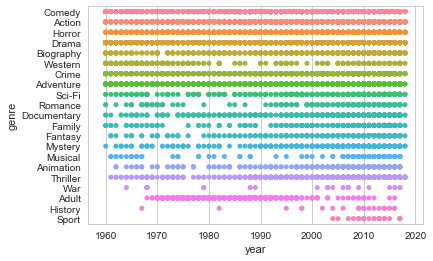

In [4]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="year",y="genre", data=imdb)

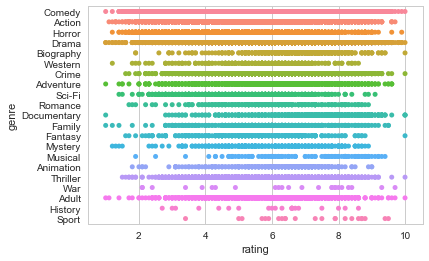

In [5]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="rating",y="genre", data=imdb)

## Dataset Prepration for the model

In [6]:
imdb["genre"]=imdb["genre"].map({
'Action': 4,
 'Adult': 8,
 'Adventure': 1,
 'Animation': 14,
 'Biography': 9,
 'Comedy': 0,
 'Crime': 3,
 'Documentary': 6,
 'Drama': 5,
 'Family': 12,
 'Fantasy': 11,
 'History': 18,
 'Horror': 2,
 'Musical': 19,
 'Mystery': 16,
 'Romance': 17,
 'Sci-Fi': 13,
 'Sport': 15,
 'Thriller': 7,
 'War': 20,
 'Western': 10})

In [7]:
#rename columns
imdb = imdb.rename(columns={'title director actor1 actor2': 'text', 'genre': 'genre','year':'year','rating':'rating','releasedate':'releasedate'})

In [8]:
#fill the missing values in release date with values in year
imdb['releasedate'].fillna(imdb['year'])

0        12 25 2001
1              1943
2        12 31 1964
3          9 1 1961
4        10 23 1963
5         8 10 1962
6          5 1 1960
7         1 27 1960
8         12 9 1960
9         3 17 1960
10         8 1 1960
11        2 10 1960
12        8 18 1960
13        6 16 1960
14        4 12 1962
15        8 22 1960
16         3 1 1960
17         4 1 1960
18         4 2 1960
19         4 1 1960
20         7 1 1960
21         8 3 1960
22       10 24 1960
23        9 15 1960
24        8 26 1960
25         7 1 1960
26        9 16 1960
27         5 1 1961
28        11 4 1960
29             1960
            ...    
41260     1 22 2018
41261     12 1 2017
41262    12 10 2017
41263     12 2 2017
41264     12 8 2017
41265     11 2 2017
41266    12 19 2017
41267    11 30 2017
41268     12 5 2017
41269     12 5 2017
41270     1 11 2018
41271     11 7 2017
41272    12 12 2017
41273     1 20 2018
41274    12 15 2017
41275     11 1 2017
41276     1 13 2018
41277    11 11 2017
41278      6 8 2018


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(imdb, imdb.genre, test_size=0.2, random_state=42 )

## Representing text as numerical data
Names are pre-processed to remove the space between first and last name hence we can use the default ngram to vectorize the dataset.

In [10]:
corpus_text=x_train.text

In [11]:
#import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(corpus_text)
x_train_dtm=vect.transform(corpus_text)

In [12]:
x_train_dtm

<33032x69358 sparse matrix of type '<class 'numpy.int64'>'
	with 191896 stored elements in Compressed Sparse Row format>

In [13]:
type(x_train_dtm)

scipy.sparse.csr.csr_matrix

In [14]:
corpus_text1=x_test.text
x_test_dtm=vect.transform(corpus_text1)

In [15]:
x_test_dtm

<8258x69358 sparse matrix of type '<class 'numpy.int64'>'
	with 35586 stored elements in Compressed Sparse Row format>

## Building a model using Multinomial Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
#train the model
%time clf.fit(x_train_dtm, y_train)

CPU times: user 51.6 ms, sys: 19.4 ms, total: 71 ms
Wall time: 70.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# make class predictions for x_test_dtm
y_pred_class = clf.predict(x_test_dtm)

In [18]:
# calculate accuracy of class preidictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.4352143376120126

# Comparing model
#### Compares multinomial Naive Bayes with logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [20]:
# train the model using x_train_dtm
%time logreg.fit(x_train_dtm,y_train)

CPU times: user 4.19 s, sys: 16.5 ms, total: 4.21 s
Wall time: 4.2 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(x_test_dtm)

In [22]:
# calculate accuracy
log= metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy score:", log)

Accuracy score: 0.43969484136594816


Since using Logistic Regression gives a little better score, I'll do the parameter tuning using this model. Below I'm testing for a small range of regularization parameter to use in the cross-validation.

In [23]:
logreg = LogisticRegression(C=5)
%time logreg.fit(x_train_dtm,y_train)

CPU times: user 5.93 s, sys: 28.2 ms, total: 5.96 s
Wall time: 5.97 s


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(x_test_dtm)

In [25]:
# calculate accuracy
logC5= metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy score for using C=5 :", logC5)

Accuracy score for using C=5 : 0.43690966335674497


In [26]:
logreg = LogisticRegression(C=0.01)
%time logreg.fit(x_train_dtm,y_train)

CPU times: user 1.68 s, sys: 27.6 ms, total: 1.71 s
Wall time: 1.73 s


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(x_test_dtm)

In [28]:
# calculate accuracy
logC1= metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy score for using C=0.01:", logC1)

Accuracy score for using C=0.01: 0.2889319447808186


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[2.2,2.3,3,4.8,4.9,5.2]}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(x_train_dtm,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:", grid.best_params_)

Best cross-validation score: 0.44
Best parameters: {'C': 3}


In [30]:
#assess the generalization performance of this parameter
print("Test score:{:.2f}".format(grid.score(x_test_dtm,y_test)))

Test score:0.44
